In [1]:
from gsd_lib import GSD, MinimalPackingGenerator
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
def unique_random_sorted(size, low=0.0, high=1.0):
    """Ensure array has unique values, regenerating if needed."""
    rng = np.random.default_rng()
    x = low + rng.random(size)**2 * (high - low)
    if len(np.unique(x)) < size:
        return unique_random_sorted(size, low, high)
    return np.sort(x)


In [3]:

# Initialize lists to store results
mass_ratio_m = []
norm_s_m = []
q_ns_m = []
errorses_m = []
iterations_m = []

mass_ratio_c = []
norm_s_c = []
q_ns_c = []
errorses_c = []
iterations_c = []

sieves = 15
rng = np.random.default_rng()

for i in range(100):
    # Example usage similar to the original main function
    
    # d = unique_random_sorted(sieves, 0.075, 75)
    d = np.array([0.00075,0.075, 0.15, 0.3, 0.6, 1.18, 2.36, 4.75, 9.5, 19, 25, 37.5, 50, 63, 75])
    
    mass = (101 - 1) * rng.random(sieves) + 1
    mass[-1] = 0.0  # Ensure last mass is zero
    # mass = [6.93546639, 12.49031735, 9.29866496, 8.61983351, 0.0]

    # Create GSD
    g = GSD(sizes=d, masses=mass)
    print(g.uscs_classification())

    # Create minimal packing generator
    sgen_m = MinimalPackingGenerator(g, x_n_factor=0.5, tol=1e-3, flex=True, density=1.0)
    sm = sgen_m.mps

    sgen_c = MinimalPackingGenerator(g, x_n_factor=0.5, tol=1e-3, flex=False, density=1.0)
    sc = sgen_c.mps

    mass_ratio_m.append(sm.total_masses[-1] / sm.total_masses[0])
    norm_s_m.append(np.sum(sm.quantities))
    q_ns_m.append(sm.quantities[-1])
    errorses_m.append(sgen_m.errors)
    iterations_m.append(sgen_m._iteration)

    mass_ratio_c.append(sc.total_masses[-1] / sc.total_masses[0])
    norm_s_c.append(np.sum(sc.quantities))
    q_ns_c.append(sc.quantities[-1])
    errorses_c.append(sgen_c.errors)
    iterations_c.append(sgen_c._iteration)  

mass_ratio_m = np.array(mass_ratio_m)
norm_s_m = np.array(norm_s_m)
q_ns_m = np.array(q_ns_m)
# errorses_m = np.array(errorses_m)
iterations_m = np.array(iterations_m)

mass_ratio_c = np.array(mass_ratio_c)
norm_s_c = np.array(norm_s_c)
q_ns_c = np.array(q_ns_c)
# errorses_c = np.array(errorses_c)
iterations_c = np.array(iterations_c)


SM
GP
GP
GP
GP-GM
SP-SM
GW-GM
SP-SM
GP-GM
GP-GM
GP-GM
SW-SM
SP-SM
SP
GP
SM
GW
SP-SM
SM
GP-GM
SP-SM
SP
GP-GM
GP-GM
SM
SP-SM
SP
SP-SM
SM
GP-GM
SM
SP
GP-GM
SP-SM
GP
GP-GM
GM
SP-SM
GW-GM
SW-SM
GM
GP-GM
SM
SP-SM
SP
GW-GM
SP
SP
GP
SM
SP
GP
GP-GM
GP-GM
SP
GP-GM
GP-GM
SM
GP
SP-SM
SP-SM
SP
SP-SM
GW-GM
SM
GP-GM
SP-SM
SP-SM
GW
SP-SM
GP
SP-SM
GP
SP-SM
GP
GP-GM
SP-SM
SP-SM
GW-GM
SM
SP-SM
GP-GM
SP
GP-GM
GM
SP
GP-GM
SP-SM
GP-GM
SP-SM
SP
SW
GW
SP-SM
GP-GM
SP-SM
SP-SM
GP-GM
SP-SM
SP-SM


In [17]:
prs = s.total_masses / np.sum(s.total_masses)

In [15]:
# pr[:-1] - prs
mass

array([68.29616095, 66.768287  ,  7.42672594, 95.60036628, 16.4992489 ,
        9.61584091, 66.98101603, 80.85467591, 46.77657895, 62.97325543,
       19.05748664, 19.52660537, 78.82162845,  8.83243329,  0.        ])

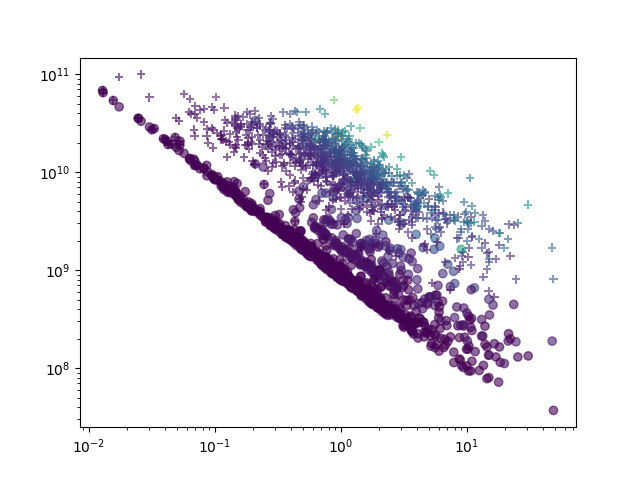

In [24]:
fig, ax = plt.subplots()

sm = ax.scatter(mass_ratio_m, norm_s_m, c=q_ns_m, cmap="viridis", alpha=0.6, marker='o')
sc = ax.scatter(mass_ratio_c, norm_s_c, c=q_ns_c, cmap="viridis", alpha=0.6, marker="+")
# sc = ax.scatter(m_max_m_min, iterations, c=q_ns, s=q_ns, cmap="viridis", alpha=0.6)
ax.set_xscale('log')
ax.set_yscale('log')

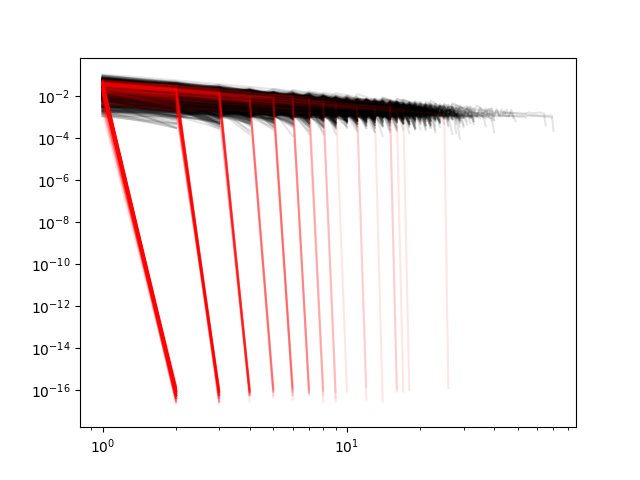

In [23]:
fig, ax = plt.subplots()

for i, error in enumerate(errorses_c):
    # print(error)
    # print(i)
    try:
        # ax.scatter(np.linspace(1, iterations[i], iterations[i]), np.max(error, axis=1), alpha=0.05, c="k")
        ax.plot(
            np.linspace(1, q_ns_c[i], q_ns_c[i]),
            np.max(error, axis=1),
            alpha=0.1,
            color="k"
        )
    finally:
        continue

for i, error in enumerate(errorses_m):
    # print(error)
    # print(i)
    try:
        # ax.scatter(np.linspace(1, iterations[i], iterations[i]), np.max(error, axis=1), alpha=0.05, c="k")
        ax.plot(
            np.linspace(1, q_ns_m[i], q_ns_m[i]),
            np.max(error, axis=1),
            alpha=0.1,
            color="r",
        )
    finally:
        continue
# sc = ax.scatter(d_max_d_min, norm_s, c=q_ns, s=q_ns, cmap="viridis", alpha=0.6)
# sc = ax.scatter(iterations, q_ns, c=q_ns, cmap="viridis", alpha=0.6)
ax.set_xscale("log")
ax.set_yscale('log')
# ax.set_ylim(1e-6, 1e-1)


In [ ]:
plt.close('all')

In [ ]:
91/61

1.4918032786885247

In [ ]:
57/49

1.163265306122449